# Notebook Summary:

In this notebook I did modeling on the data downloaded from pushshift API. 

This was divided into the following parts:

* Preprocessing - I processed the data similar to notebook 4 - adding title length and title word count columns.

* Defined my baseline accuracy as 57.8%

* I generally tried two types of vectorizing in my models:
  * CountVectorizer (CV)
  * TfidfVectorizer (TV)
  
  
* I generally tried three types of classification models:
  * Multinomial Naive Bayes (MNB) - because it's good with words
  * Logistic (Log) - because it's very interpretable
  * Random Forest Classifier (RFC) - because it often gives good results


* I created models using the above combinations of vectorization and model types on four sets of data.  
  * **Model Group 1**: Modeled on Words in the Title 
  * **Model Group 2**: Modeled on URLS
  * **Model Group 3**: Modeled on Words in the Title, URLs, and Title Charactistics (word count and length of the title)
  * **Model Group 4**: Modeled on Title Charactistics (word count and length of the title)


* I include 4 summary tables for each data set below showing each model and the results.


 * **Model Group 1**

| Link | Dataset | Vectorizer| Model| Cross-Val Acc.| Train Acc.| Test Acc.| Spec.| Sens.| Notes |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |--- |
| [1a](#Model-Group-1a:)| Title Words | CV | MNB |0.673|0.688|0.676|0.759|0.562|  |
| [1b](#Model-Group-1b:)|**Title Words**|**CV**| **Log**|**0.690**|**0.714**|**0.695**|**0.753**|**0.617**|**Best of Group 1**|
| [1c](#Model-Group-1c:)| Title Words | CV | RFC |0.578|0.578|0.578|1.000|0.000|  |
| [1d](#Model-Group-1d:)| Title Words | TV | MNB |0.671|0.686|0.676|0.838|0.454|  |
| [1e](#Model-Group-1e:)| Title Words | TV | Log |0.689|0.713|0.694|0.781|0.575|  |
| [1f](#Model-Group-1f:)| Title Words | TV | RFC |0.578|0.578|0.578|1.000|0.001|  |



 * **Model Group 2**

| Link | Dataset | Vectorizer| Model| Cross-Val Acc.| Train Acc.| Test Acc.| Spec.| Sens.| Notes |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |--- |
| [2a](#Model-Group-2a:)| URL | CV | MNB         |0.772|0.783|0.776|0.903|0.603|  |
| [2b](#Model-Group-2b:)| URL | CV | Log         |0.773|0.785|0.778|0.904|0.604|  |
| [2c](#Model-Group-2c:)| URL | CV | RFC         |     |     |     |     |     |not run due to time|
| [2d](#Model-Group-2d:)| URL | TV | MNB         |0.775|0.796|0.779|0.899|0.615|  |
| [2e](#Model-Group-2e:)|**URL**|**TV**|**Log**|**0.776**|**0.797**|**0.780**|**0.903**|**0.611**|**Best of Group 2**|
| [2f](#Model-Group-2f:)| URL | TV | RFC         |     |     |     |     |     |not run due to time|



 * **Model Group 3**

| Link | Dataset | Vectorizer| Model| Cross-Val Acc.| Train Acc.| Test Acc.| Spec.| Sens.| Notes |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | --- |
| [3a](#Model-Group-3a:)| Title Words/URL/Title Chars|CV-words, TV-URL| MNB|n/a|0.778|0.772|0.713|0.815|   |
| [3b](#Model-Group-3b:)|**Title Words/URL/Title Chars**|**CV-words, TV-URL**| **Log**|**n/a**|**0.800**|**0.785**|**0.704**|**0.843**|**Best of Group 3**|
| [3c](#Model-Group-3c:)| Title Words, URL, Title Chars| CV-words, TV-URL| RFC| | | | | |not run due to time|



 * **Model Group 4**

| Link | Dataset | Vectorizer| Model| Cross-Val Acc.| Train Acc.| Test Acc.| Spec.| Sens.| Notes |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | --- |
| [4a](#Model-Group-4a:)| Title Chars | n/a | MNB|n/a  |0.578|0.578|0.0  |1.0  |  |
| [4b](#Model-Group-4b:)| **Title Chars** | **n/a** | **Log**|**n/a**  |**0.585**|**0.582**|**0.828**|**0.247**|**Best of Group 4**|

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

# from Lab 5.02
# this setting widens how many characters pandas will display in a column:
pd.options.display.max_colwidth = 400


# imports from NLP II lecture

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
df = pd.read_csv('../data/reps_and_dems.csv')

# Preprocessing

In [76]:
df['title_length'] = df['title'].apply(lambda x: len(x))

In [77]:
df['title_word_count'] = df['title'].apply(lambda x: len(x.split()))

In [78]:
df['url_long'] = df['url'].apply(lambda x: x.split('/'))
df['url_primary'] = df['url_long'].apply(lambda x: x[2])

In [79]:
df['url_primary_long'] = df['url_primary'].replace('www.', '', regex=True)

In [80]:
df = df[['subreddit','title','title_length','title_word_count','url_primary_long']]

In [81]:
df.head()

,subreddit,title,title_length,title_word_count,url_primary_long
0,democrats,Happy Halloween!,16,2,i.redd.it
1,democrats,"someone I follow pointed out that Russia today is making content (in English for Americans) attacking anti racists unless the racist happens to be Jewish his comment was ""rejected"" by Russia today",196,32,i.redd.it
2,democrats,HOW DONALD TRUMP AND THE REPUBLICAN PARTY SCREWED THE AMERICAN WORKER,69,11,reddit.com
3,democrats,BTRTN: Ten Days in November... Would You Make This Deal to Get Rid of Trump?,76,15,borntorunthenumbers.com
4,democrats,Never forget that long after he's gone our children will have to memorize this history.,87,15,youtu.be


In [82]:
df.isnull().sum()

subreddit           0
title               0
title_length        0
title_word_count    0
url_primary_long    0
dtype: int64

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214019 entries, 0 to 214018
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   subreddit         214019 non-null  object
 1   title             214019 non-null  object
 2   title_length      214019 non-null  int64 
 3   title_word_count  214019 non-null  int64 
 4   url_primary_long  214019 non-null  object
dtypes: int64(2), object(3)
memory usage: 8.2+ MB


---
## First Group of Models:  Model based on Words in the Title
---

###  try 2 vectorizers: CountVectorizer and TfidfVectorizer
### try 3 models: Logistic, Multinomial Naive Bayes, Random Forests 
---

In [84]:
df['subreddit'] = df['subreddit'].map({'Republican':1,'democrats':0})

In [85]:
X = df['title']
y = df['subreddit']

### Baseline Accuracy

In [86]:
#baseline accuracy in y
y.value_counts(normalize = True)

0    0.577837
1    0.422163
Name: subreddit, dtype: float64

In [87]:
# Split the data

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify = y,
                                                    random_state=42)

### Review max_features and how many times a word appears at a given cutoff 
### (to see if that many features makes sense)

In [73]:
cvec = CountVectorizer(max_features=10_000)
cvec.fit(X_train)

X_train_t = cvec.transform(X_train)

X_train_df = pd.DataFrame(X_train_t.todense(),
                         columns=cvec.get_feature_names())

#bottom appearing words
X_train_df.sum().sort_values(ascending = True).head(10)

proclaimed       13
frightened       13
inadvertently    13
annoyed          13
severely         13
worn             13
expertise        13
stranger         13
masculinity      13
crooks           13
dtype: int64

In [49]:
X_train_df.shape

(160514, 10000)

In [50]:
# 13 out of 150414 is minimal appearance, so no need to get that many features when doing prediction

In [56]:
cvec = CountVectorizer(max_features=5_000)
cvec.fit(X_train)

X_train_t = cvec.transform(X_train)

X_train_df = pd.DataFrame(X_train_t.todense(),
                         columns=cvec.get_feature_names())

#bottom appearing words
X_train_df.sum().sort_values(ascending = True).head(10)

medicine        41
depends         41
spies           41
krauthammer     42
reproductive    42
exercise        42
placed          42
globe           42
segment         42
limiting        42
dtype: int64

In [57]:
42/160514

0.00026165941911608957

In [ ]:
# this is still a low percentage, but I'll stop here

### Create function to review results of grid search

In [30]:
# Function to review results

def results(fxn_name,X_test,y_test, X_train, y_train):

    #calculate cross-val score
    cvs = fxn_name.best_score_
    print('Best Score(cross_val_score) is: ', cvs)
    print('----------------------------------------------------------------------')
    
    # best params for the score
    bps = fxn_name.best_params_
    print('Best parameters for the best score(cross_val_score) are: ', bps)
    print('----------------------------------------------------------------------')
    
    # accuracy scores
    train_sc = fxn_name.score(X_train, y_train) 
    test_sc = fxn_name.score(X_test, y_test)
    print('Train score is: ', train_sc)
    print('Test score is: ', test_sc)
    print('----------------------------------------------------------------------')
    
    #Review predictions
    preds = fxn_name.predict(X_test)

    # Save confusion matrix values
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

    plot_confusion_matrix(fxn_name, X_test, y_test, cmap='Blues', values_format='d');

    # Calculate the specificity and sensitivity
    spec = tn / (tn + fp)
    print('Specificity: ', spec)
    
    sens = tp / (tp + fn)
    print('Sensitivity: ', sens)

### Create function to review results of one model run

In [29]:
def results_cleaned(fxn_name,X_test,y_test, X_train, y_train):
    
    # accuracy scores
    train_sc = fxn_name.score(X_train, y_train) 
    test_sc = fxn_name.score(X_test, y_test)
    print('Train score is: ', train_sc)
    print('Test score is: ', test_sc)
    print('----------------------------------------------------------------------')
    
    #Review predictions
    preds = fxn_name.predict(X_test)

    # Save confusion matrix values
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

    plot_confusion_matrix(fxn_name, X_test, y_test, cmap='Blues', values_format='d');

    # Calculate the specificity and sensitivity
    spec = tn / (tn + fp)
    print('Specificity: ', spec)
    
    sens = tp / (tp + fn)
    print('Sensitivity: ', sens)

### Model Group 1a: 
 * **Based on:** Words in the Title
 * **Vectorizer:** CountVectorizer
 * **Model:** Multinomial Naive Bays

In [63]:
# From NLP II lecture

# Let's set a pipeline up with two stages:
# 1. CountVectorizer (transformer)
# 2. Multinomial Naive Bayes (estimator)

pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB())
])

pipe_params = {
    'cvec__max_features': [4_000, 5_000],
    'cvec__stop_words': ['english',None],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1), (1,2)]
}

gs = GridSearchCV(pipe, # what object are we optimizing?
                  param_grid=pipe_params, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.

gs.fit(X_train, y_train)

Best Score(cross_val_score) is:  0.6733618293555163
----------------------------------------------------------------------
Best parameters for the best score(cross_val_score) are:  {'cvec__max_df': 0.9, 'cvec__max_features': 5000, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': None}
----------------------------------------------------------------------
Train score is:  0.6875475036445419
Test score is:  0.6761984861227922
----------------------------------------------------------------------
Specificity:  0.7593556942782288
Sensitivity:  0.5623782539401452


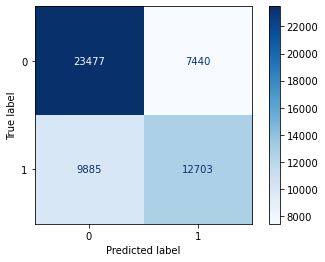

In [77]:
results(gs,X_test,y_test, X_train, y_train)

### Model Group 1b: 
 * **Based on:** Words in the Title
 * **Vectorizer:** CountVectorizer
 * **Model:** Logistic

In [79]:
# From NLP_tweets

pipe2 = Pipeline([
    ('cvec', CountVectorizer()),
    ('log', LogisticRegression())
])

pipe_params2 = {
    'cvec__max_features': [4_000, 5_000],
    'cvec__stop_words': ['english', None],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1), (1,2)],
    'log__C': [.1, 1, 10],
    'log__solver': ['liblinear'],
    'log__penalty': ['l1']
}

gs2 = GridSearchCV(pipe2, # what object are we optimizing?
                  param_grid=pipe_params2, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.

gs2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('log', LogisticRegression())]),
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [4000, 5000],
                         'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': ['english', None],
                         'log__C': [0.1, 1, 10], 'log__penalty': ['l1'],
                         'log__solver': ['liblinear']})

Best Score(cross_val_score) is:  0.6903821406276496
----------------------------------------------------------------------
Best parameters for the best score(cross_val_score) are:  {'cvec__max_df': 0.9, 'cvec__max_features': 5000, 'cvec__min_df': 3, 'cvec__ngram_range': (1, 2), 'cvec__stop_words': 'english', 'log__C': 1, 'log__penalty': 'l1', 'log__solver': 'liblinear'}
----------------------------------------------------------------------
Train score is:  0.7142803742975691
Test score is:  0.6953929539295393
----------------------------------------------------------------------
Specificity:  0.7526280040107385
Sensitivity:  0.6170533026385692


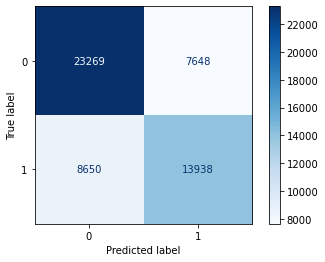

In [80]:
results(gs2,X_test,y_test, X_train, y_train)

### Performs best of Group 1 - so analyze the best result of the grid search

In [90]:
cvec = CountVectorizer(max_features=5000,
                       stop_words='english',
                       min_df=3,
                       max_df=.9,
                       ngram_range=(1,2))

X_train_a = pd.DataFrame(cvec.fit_transform(X_train).todense(),
                        columns=cvec.get_feature_names())

X_test_a = pd.DataFrame(cvec.transform(X_test).todense(),
                        columns=cvec.get_feature_names())

logreg = LogisticRegression(C=1.0,
                            solver='liblinear',
                           penalty='l1')

logreg.fit(X_train_a, y_train)

logreg.score(X_train_a, y_train), logreg.score(X_test_a, y_test)

(0.714323984200755, 0.6954864031398935)

In [91]:
logreg.coef_

coefs = np.exp(logreg.coef_)
cols = X_train_a.columns

coefs_df = pd.DataFrame(zip(coefs[0], cols), columns = ['coef','feature'])

coefs_df.head()
 
coefs_df.sort_values('coef',ascending = False).head(25).set_index('feature')

,coef
feature,
smythtv,52.948070
preborn,50.931299
aborted,44.368494
abortionist,32.478851
lockdowns,23.703363
kasich,12.634629
york,12.352263
lerner,11.918878
realclearpolitics,11.168933


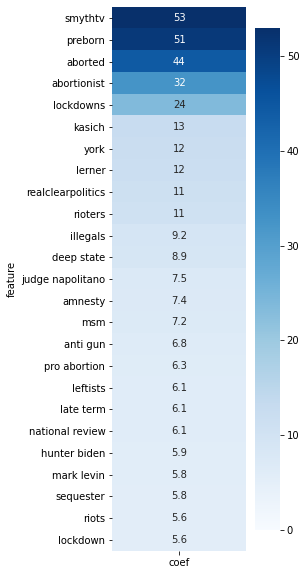

In [93]:
plt.figure(figsize = (3,10))
sns.heatmap(coefs_df.sort_values('coef',ascending = False).head(25).set_index('feature'),
           cmap = 'Blues',
           vmin = 0,
           annot = True)

### Model Group 1c: 
 * **Based on:** Words in the Title
 * **Vectorizer:** CountVectorizer
 * **Model:** Random Forest

***To reduce calculation time, reduce max features option to just 5,000 since both above used 5,000 for the max features**

In [ ]:
# From Random Forests and Extra Trees

pipe3 = Pipeline([
    ('cvec', CountVectorizer()),
    ('rf', RandomForestClassifier())
])

pipe_params3 = {
    'cvec__max_features': [5_000],
    'cvec__stop_words': ['english',None],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1), (1,2)],
    'rf__n_estimators': [75, 100, 125],
    'rf__max_depth': [None, 3, 4],
    'rf__max_features': ['auto', None]
}

gs3 = GridSearchCV(pipe3, # what object are we optimizing?
                  param_grid=pipe_params3, # what parameters values are we searching?
                  cv=5, # 5-fold cross-validation
                  n_jobs=-1) # use all processors so faster

gs3.fit(X_train, y_train)

In [ ]:
results(gs3,X_test,y_test, X_train, y_train)

**the above code took over 3 hrs to run, so going to try fewer cases**

In [86]:
# From Random Forests and Extra Trees

pipe3a = Pipeline([
    ('cvec', CountVectorizer()),
    ('rf', RandomForestClassifier())
])

pipe_params3a = {
    'cvec__max_features': [5_000],
    'cvec__stop_words': [None],
    'cvec__min_df': [2],
    'cvec__max_df': [.9],
    'cvec__ngram_range': [(1,2)],
    'rf__n_estimators': [125],
    'rf__max_depth': [4],
    'rf__max_features': ['auto']
}

gs3a = GridSearchCV(pipe3a, # what object are we optimizing?
                  param_grid=pipe_params3a, # what parameters values are we searching?
                  cv=2, # 5-fold cross-validation
                  n_jobs=-1) # use all processors so faster

%time gs3a.fit(X_train, y_train)

Wall time: 13.4 s


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'cvec__max_df': [0.9], 'cvec__max_features': [5000],
                         'cvec__min_df': [2], 'cvec__ngram_range': [(1, 2)],
                         'cvec__stop_words': [None], 'rf__max_depth': [4],
                         'rf__max_features': ['auto'],
                         'rf__n_estimators': [125]})

Best Score(cross_val_score) is:  0.5778374472008672
----------------------------------------------------------------------
Best parameters for the best score(cross_val_score) are:  {'cvec__max_df': 0.9, 'cvec__max_features': 5000, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 2), 'cvec__stop_words': None, 'rf__max_depth': 4, 'rf__max_features': 'auto', 'rf__n_estimators': 125}
----------------------------------------------------------------------
Train score is:  0.5779745068965947
Test score is:  0.5780207457246986
----------------------------------------------------------------------
Specificity:  0.9999676553352524
Sensitivity:  0.00048698423941916064


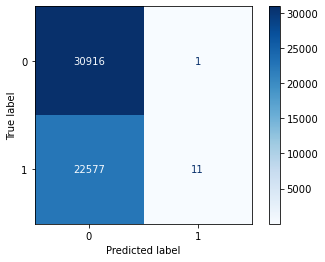

In [87]:
results(gs3a,X_test,y_test, X_train, y_train)

### Model Group 1d: 
 * **Based on:** Words in the Title
 * **Vectorizer:** TfidfVectorizer
 * **Model:** Multinomial Naive Bayes

In [88]:
# From NLP II lecture

# Let's set a pipeline up with two stages:
# 1. CountVectorizer (transformer)
# 2. Multinomial Naive Bayes (estimator)

pipe4 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

pipe_params4 = {
    'tvec__max_features': [5_000],
    'tvec__stop_words': ['english',None],
    'tvec__ngram_range': [(1,1), (1,2)]
}

gs4 = GridSearchCV(pipe4, # what object are we optimizing?
                  param_grid=pipe_params4, # what parameters values are we searching?
                  cv=3, # 5-fold cross-validation
                  n_jobs=-1)

%time gs4.fit(X_train, y_train)

Wall time: 11.4 s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'tvec__max_features': [5000],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': ['english', None]})

Best Score(cross_val_score) is:  0.6709321245279286
----------------------------------------------------------------------
Best parameters for the best score(cross_val_score) are:  {'tvec__max_features': 5000, 'tvec__ngram_range': (1, 2), 'tvec__stop_words': 'english'}
----------------------------------------------------------------------
Train score is:  0.686014927046862
Test score is:  0.6761050369124381
----------------------------------------------------------------------
Specificity:  0.838244331597503
Sensitivity:  0.45417921020010626


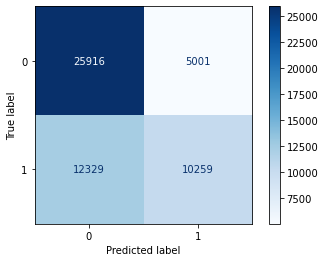

In [89]:
results(gs4,X_test,y_test, X_train, y_train)

### Model Group 1e: 
 * **Based on:** Words in the Title
 * **Vectorizer:** TfidfVectorizer
 * **Model:** Logistic

In [92]:
# From NLP_tweets

pipe5 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('log', LogisticRegression())
])

pipe_params5 = {
    'tvec__max_features': [5_000],
    'tvec__stop_words': ['english',None],
    'tvec__ngram_range': [(1,1), (1,2)],
    'log__C': [.1, 1, 10],
    'log__solver': ['liblinear'],
    'log__penalty': ['l1']
}

gs5 = GridSearchCV(pipe5, # what object are we optimizing?
                  param_grid=pipe_params5, # what parameters values are we searching?
                  cv=3) # 5-fold cross-validation.

%time gs5.fit(X_train, y_train)

Wall time: 2min 2s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('log', LogisticRegression())]),
             param_grid={'log__C': [0.1, 1, 10], 'log__penalty': ['l1'],
                         'log__solver': ['liblinear'],
                         'tvec__max_features': [5000],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': ['english', None]})

Best Score(cross_val_score) is:  0.6892046738866614
----------------------------------------------------------------------
Best parameters for the best score(cross_val_score) are:  {'log__C': 1, 'log__penalty': 'l1', 'log__solver': 'liblinear', 'tvec__max_features': 5000, 'tvec__ngram_range': (1, 2), 'tvec__stop_words': None}
----------------------------------------------------------------------
Train score is:  0.7131589767870715
Test score is:  0.6943463227735726
----------------------------------------------------------------------
Specificity:  0.7813177216418152
Sensitivity:  0.5753054719319993


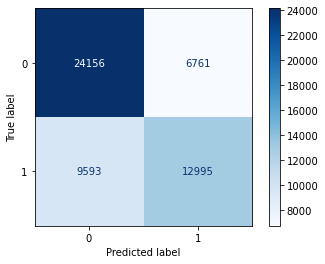

In [93]:
results(gs5,X_test,y_test, X_train, y_train)

### Model Group 1f: 
 * **Based on:** Words in the Title
 * **Vectorizer:** TfidfVectorizer
 * **Model:** Random Forest

In [95]:
# From Random Forests and Extra Trees

pipe6 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('rf', RandomForestClassifier())
])

pipe_params6 = {
    'tvec__max_features': [5_000],
    'tvec__stop_words': [None],
    'tvec__ngram_range': [(1,2)],
    'rf__n_estimators': [125],
    'rf__max_depth': [4],
    'rf__max_features': ['auto']
}

gs6 = GridSearchCV(pipe6, # what object are we optimizing?
                  param_grid=pipe_params6, # what parameters values are we searching?
                  cv=3) # 5-fold cross-validation.

%time gs6.fit(X_train, y_train)

Wall time: 24.7 s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__max_depth': [4], 'rf__max_features': ['auto'],
                         'rf__n_estimators': [125],
                         'tvec__max_features': [5000],
                         'tvec__ngram_range': [(1, 2)],
                         'tvec__stop_words': [None]})

Best Score(cross_val_score) is:  0.5783047006331445
----------------------------------------------------------------------
Best parameters for the best score(cross_val_score) are:  {'rf__max_depth': 4, 'rf__max_features': 'auto', 'rf__n_estimators': 125, 'tvec__max_features': 5000, 'tvec__ngram_range': (1, 2), 'tvec__stop_words': None}
----------------------------------------------------------------------
Train score is:  0.578124026564661
Test score is:  0.5780581254088403
----------------------------------------------------------------------
Specificity:  0.9999676553352524
Sensitivity:  0.0005755268284044626


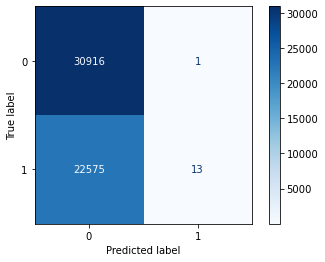

In [96]:
results(gs6,X_test,y_test, X_train, y_train)

---
## Second Group of Models:  Model based on URL
---

###  try 2 vectorizers: CountVectorizer and TfidfVectorizer
### try 3 models: Logistic, Multinomial Naive Bayes, Random Forests 
---

In [57]:
X2 = df['url_primary_long']
y2 = df['subreddit']

# Split the data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,
                                                        y2,
                                                        stratify = y2,
                                                        random_state=42)

### Model Group 2a: 
 * **Based on:** URL
 * **Vectorizer:** CountVectorizer
 * **Model:** Multinomial Naive Bays

In [98]:
# From NLP II lecture

# Let's set a pipeline up with two stages:
# 1. CountVectorizer (transformer)
# 2. Multinomial Naive Bayes (estimator)

pipe7 = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB())
])

pipe_params7 = {
    'cvec__stop_words': ['english',None],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1), (1,2)]
}

gs7 = GridSearchCV(pipe7, # what object are we optimizing?
                  param_grid=pipe_params7, # what parameters values are we searching?
                  cv=3) # 5-fold cross-validation.

gs7.fit(X_train2, y_train2)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'cvec__max_df': [0.9, 0.95], 'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': ['english', None]})

Best Score(cross_val_score) is:  0.7721195708449343
----------------------------------------------------------------------
Best parameters for the best score(cross_val_score) are:  {'cvec__max_df': 0.9, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': 'english'}
----------------------------------------------------------------------
Train score is:  0.7827479222996125
Test score is:  0.7763386599383235
----------------------------------------------------------------------
Specificity:  0.9029983504220979
Sensitivity:  0.6029750309899061


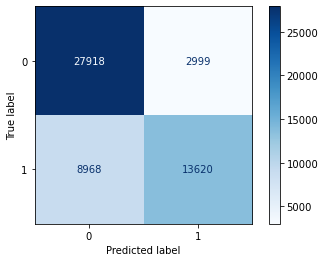

In [99]:
results(gs7,X_test2,y_test2, X_train2, y_train2)

### Model Group 2b: 
 * **Based on:** URL
 * **Vectorizer:** CountVectorizer
 * **Model:** Logistic

In [100]:
# From NLP_tweets

pipe8 = Pipeline([
    ('cvec', CountVectorizer()),
    ('log', LogisticRegression())
])

pipe_params8 = {
    'cvec__stop_words': ['english', None],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1), (1,2)],
    'log__C': [.1, 1, 10],
    'log__solver': ['liblinear'],
    'log__penalty': ['l1']
}

gs8 = GridSearchCV(pipe8, # what object are we optimizing?
                  param_grid=pipe_params8, # what parameters values are we searching?
                  cv=3) # 5-fold cross-validation.

gs8.fit(X_train2, y_train2)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('log', LogisticRegression())]),
             param_grid={'cvec__max_df': [0.9, 0.95], 'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': ['english', None],
                         'log__C': [0.1, 1, 10], 'log__penalty': ['l1'],
                         'log__solver': ['liblinear']})

Best Score(cross_val_score) is:  0.773066525288407
----------------------------------------------------------------------
Best parameters for the best score(cross_val_score) are:  {'cvec__max_df': 0.95, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 2), 'cvec__stop_words': None, 'log__C': 10, 'log__penalty': 'l1', 'log__solver': 'liblinear'}
----------------------------------------------------------------------
Train score is:  0.7854081263939594
Test score is:  0.7776843285674236
----------------------------------------------------------------------
Specificity:  0.9044862050004852
Sensitivity:  0.604126084646715


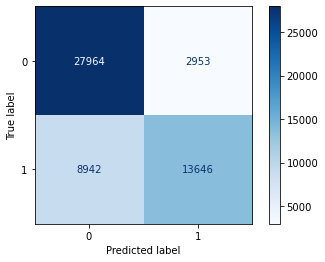

In [101]:
results(gs8,X_test2,y_test2, X_train2, y_train2)

### Model Group 2c: 
 * **Based on:** URL
 * **Vectorizer:** CountVectorizer
 * **Model:** Random Forest

### Note: Not Run due to lack of time

In [ ]:
# From Random Forests and Extra Trees

pipe9 = Pipeline([
    ('cvec', CountVectorizer()),
    ('rf', RandomForestClassifier())
])

pipe_params9 = {
    'cvec__stop_words': ['english',None],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1), (1,2)],
    'rf__n_estimators': [75, 100, 125],
    'rf__max_depth': [None, 3, 4],
    'rf__max_features': ['auto', None]
}

gs9 = GridSearchCV(pipe9, # what object are we optimizing?
                  param_grid=pipe_params9, # what parameters values are we searching?
                  cv=3) # 5-fold cross-validation.

gs9.fit(X_train2, y_train2)

In [ ]:
results(gs9,X_test2,y_test2, X_train2, y_train2)

### Model Group 2d: 
 * **Based on:** URL
 * **Vectorizer:** TfidfVectorizer
 * **Model:** Multinomial Naive Bays

In [102]:
# From NLP II lecture

# Let's set a pipeline up with two stages:
# 1. CountVectorizer (transformer)
# 2. Multinomial Naive Bayes (estimator)

pipe10 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

pipe_params10 = {
    'tvec__stop_words': ['english',None],
    'tvec__ngram_range': [(1,1), (1,2)]
}

gs10 = GridSearchCV(pipe10, # what object are we optimizing?
                  param_grid=pipe_params10, # what parameters values are we searching?
                  cv=3) # 5-fold cross-validation.

gs10.fit(X_train2, y_train2)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': ['english', None]})

Best Score(cross_val_score) is:  0.7751722611184068
----------------------------------------------------------------------
Best parameters for the best score(cross_val_score) are:  {'tvec__ngram_range': (1, 2), 'tvec__stop_words': None}
----------------------------------------------------------------------
Train score is:  0.7956377636841646
Test score is:  0.7787309597233903
----------------------------------------------------------------------
Specificity:  0.898534786686936
Sensitivity:  0.6147511953249513


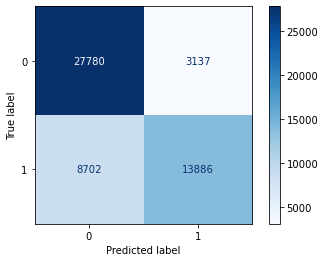

In [103]:
results(gs10,X_test2,y_test2, X_train2, y_train2)

### Model Group 2e: 
 * **Based on:** URL
 * **Vectorizer:** TfidfVectorizer
 * **Model:** Logistic

In [106]:
# From NLP_tweets

pipe11 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('log', LogisticRegression())
])

pipe_params11 = {
    'tvec__stop_words': ['english',None],
    'tvec__ngram_range': [(1,1), (1,2)],
    'log__C': [.1, 1, 10],
    'log__solver': ['liblinear'],
    'log__penalty': ['l1']
}

gs11 = GridSearchCV(pipe11, # what object are we optimizing?
                  param_grid=pipe_params11, # what parameters values are we searching?
                  cv=3) # 5-fold cross-validation.

gs11.fit(X_train2, y_train2)

C:\Users\jennw\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('log', LogisticRegression())]),
             param_grid={'log__C': [0.1, 1, 10], 'log__penalty': ['l1'],
                         'log__solver': ['liblinear'],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': ['english', None]})

Best Score(cross_val_score) is:  0.7756145890108944
----------------------------------------------------------------------
Best parameters for the best score(cross_val_score) are:  {'log__C': 10, 'log__penalty': 'l1', 'log__solver': 'liblinear', 'tvec__ngram_range': (1, 2), 'tvec__stop_words': 'english'}
----------------------------------------------------------------------
Train score is:  0.7971890302403528
Test score is:  0.7797215213531445
----------------------------------------------------------------------
Specificity:  0.9033541417343209
Sensitivity:  0.6105011510536568


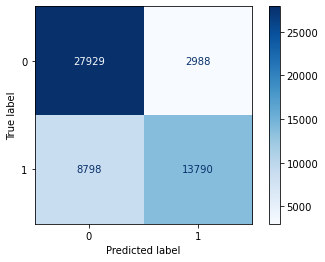

In [107]:
results(gs11,X_test2,y_test2, X_train2, y_train2)

### Performs best of Group 2 - so analyze the best result of the grid search

In [60]:
tvec = TfidfVectorizer(stop_words='english',
                       ngram_range=(1,2))

X_train_b = pd.DataFrame(tvec.fit_transform(X_train2).todense(),
                        columns=tvec.get_feature_names())

X_test_b = pd.DataFrame(tvec.transform(X_test2).todense(),
                        columns=tvec.get_feature_names())

logreg = LogisticRegression(C=10,
                            solver='liblinear',
                           penalty='l1')

logreg.fit(X_train_b, y_train2)

logreg.score(X_train_b, y_train2), logreg.score(X_test_b, y_test2)


(0.7971890302403528, 0.779665451826932)

In [62]:
logreg.coef_

coefs = np.exp(logreg.coef_)
cols = X_train_b.columns

coefs_df = pd.DataFrame(zip(coefs[0], cols), columns = ['coef','feature'])

coefs_df.head()
 
coefs_df.sort_values('coef',ascending = False).head(25).set_index('feature')

,coef
feature,
liveaction,3.624483e+06
nu,2.585821e+06
mises,1.063140e+05
aei,7.524318e+04
tedcruz org,2.090318e+04
city,1.500705e+04
free,1.235561e+04
newrightnetwork,7.548828e+03
vdare com,7.162094e+03


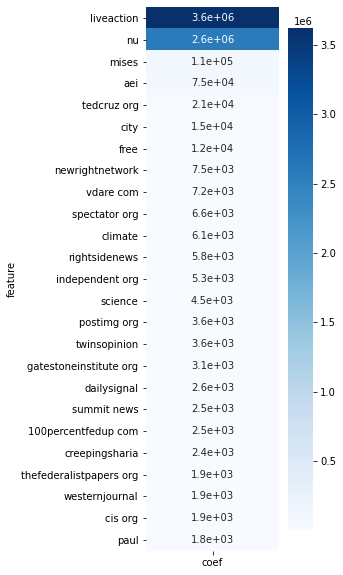

In [64]:
plt.figure(figsize = (3,10))
sns.heatmap(coefs_df.sort_values('coef',ascending = False).head(25).set_index('feature'),
           cmap = 'Blues',
           #vmin = 1,
           annot = True)

### Model Group 2f: 
 * **Based on:** URL
 * **Vectorizer:** TfidfVectorizer
 * **Model:** Random Forest

### Note: Not Run due to lack of time

In [ ]:
# From Random Forests and Extra Trees

pipe12 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('rf', RandomForestClassifier())
])

pipe_params12 = {
    'tvec__stop_words': ['english',None],
    'tvec__ngram_range': [(1,1), (1,2)]
    'rf__n_estimators': [75, 100, 125],
    'rf__max_depth': [None, 3, 4],
    'rf__max_features': ['auto', None]
}

gs12 = GridSearchCV(pipe12, # what object are we optimizing?
                  param_grid=pipe_params12, # what parameters values are we searching?
                  cv=3) # 5-fold cross-validation.

gs12.fit(X_train, y_train)

In [ ]:
results(gs12,X_test,y_test, X_train, y_train)

---
## Third Group of Models:  Words in the Title, URL, and Title Characteristics
---

###  vectorizers:  use the best params from above (either CountVectorizer or TfidfVectorizer) for each data type 
### try 3 models: Logistic, Multinomial Naive Bayes, Random Forests 
---

In [11]:
X3 = df[['title','title_length','title_word_count','url_primary_long']]
y3 = df['subreddit']

# Split the data
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,
                                                        y3,
                                                        stratify = y3,
                                                        random_state=42)

In [19]:
X_train3.head()

,title,title_length,title_word_count,url_primary_long
48078,3 GOP Senators Open to Delaying Kavanaugh Vote Over Sexual Assault Claim,72,12,nymag.com
41580,"Of course President Trump dodged the draft. Should we still care? -- Trump made it clear to the right when it comes to the cultural divide of the 1960s, he’s firmly on their side. Trump signals to those voters through race and his highly visible attacks on African Americans who get too uppity.",294,53,washingtonpost.com
99786,"Hillary Clinton announces plans to help people with autism access services, independence",88,12,mashable.com
10243,MIL shared this...smh,21,3,m.facebook.com
198441,Ramesh Ponnuru - Obamacare and Work,35,6,nationalreview.com


### Separate out the title and vectorize using whichever vectorizer performed better above
---
#### Use CountVectorizer because performed better

In [12]:
# From NLP_tweets

cvec_title = CountVectorizer(max_features=3000,  # reduce so don't exceed memory
                      stop_words='english',
                      min_df=3,
                      max_df=.9,
                      ngram_range=(1,2))

X_train3_title = pd.DataFrame(cvec_title.fit_transform(X_train3['title']).todense(),
                              columns=cvec_title.get_feature_names())

X_test3_title = pd.DataFrame(cvec_title.transform(X_test3['title']).todense(),
                              columns=cvec_title.get_feature_names())

In [13]:
X_train3_title.head()

,000,10,100,100 000,11,12,13,14,15,16,...,years,years ago,yes,yesterday,york,york times,young,youth,youtube,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X_test3_title.head()

,000,10,100,100 000,11,12,13,14,15,16,...,years,years ago,yes,yesterday,york,york times,young,youth,youtube,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Separate out the URL and vectorize using whichever vectorizer performed better above
---
#### Use TfidfVectorizer because performed better

In [15]:
tvec_url = TfidfVectorizer(max_features=500,   # add so don't exceed memory capacity
                           stop_words='english',
                           ngram_range=(1,2))

X_train3_url = pd.DataFrame(tvec_url.fit_transform(X_train3['url_primary_long']).todense(),
                              columns=tvec_url.get_feature_names())

X_test3_url = pd.DataFrame(tvec_url.transform(X_test3['url_primary_long']).todense(),
                              columns=tvec_url.get_feature_names())

In [16]:
X_train3_url.head()

,71republic,71republic com,abcnews,abcnews com,ace,ace mu,addictinginfo,addictinginfo org,ajc,ajc com,...,wordpress com,wsj,wsj com,yahoo,yahoo com,youtu,youtube,youtube com,zerohedge,zerohedge com
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.692414,0.692414,0.0,0.0


In [17]:
X_test3_url.head()

,71republic,71republic com,abcnews,abcnews com,ace,ace mu,addictinginfo,addictinginfo org,ajc,ajc com,...,wordpress com,wsj,wsj com,yahoo,yahoo com,youtu,youtube,youtube com,zerohedge,zerohedge com
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
X_train3_url.shape

(160514, 500)

### Combine the data frames with Words in the Title, URL, and Title Characteristics together

In [19]:
#reset indices of title_length and title word_count so can add to the vectorized df's

X_train3_lengths = X_train3[['title_length','title_word_count']].reset_index(drop=True)
X_test3_lengths = X_test3[['title_length','title_word_count']].reset_index(drop=True)

In [20]:
X_train_final = pd.concat([X_train3_title,X_train3_url,X_train3_lengths], axis=1)

In [21]:
X_train_final.head()

,000,10,100,100 000,11,12,13,14,15,16,...,wsj com,yahoo,yahoo com,youtu,youtube,youtube com,zerohedge,zerohedge com,title_length,title_word_count
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,77,12
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,76,16
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,65,11
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,86,15
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.692414,0.692414,0.0,0.0,32,4


In [22]:
X_train_final.isnull().sum().sort_values()

000                 0
says trump          0
sc                  0
scalia              0
scam                0
                   ..
happened            0
happening           0
happens             0
half                0
title_word_count    0
Length: 3502, dtype: int64

In [23]:
X_test_final = pd.concat([X_test3_title,X_test3_url,X_test3_lengths], axis = 1)

In [24]:
X_test_final.head()

,000,10,100,100 000,11,12,13,14,15,16,...,wsj com,yahoo,yahoo com,youtu,youtube,youtube com,zerohedge,zerohedge com,title_length,title_word_count
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80,9
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26,4
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83,11
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,294,47
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74,11


In [25]:
X_test_final.isnull().sum().sort_values()

000                 0
says trump          0
sc                  0
scalia              0
scam                0
                   ..
happened            0
happening           0
happens             0
half                0
title_word_count    0
Length: 3502, dtype: int64

In [36]:
# need to scale

ss = StandardScaler()
ss.fit(X_train_final)

X_train_final_s = ss.transform(X_train_final)
X_test_final_s = ss.transform(X_test_final)

### Model Group 3a: 
 * **Based on:** Words in the Title, URL, and Title Characteristics
 * **Vectorizer:** 
   * **for Words in Title:** CountVectorizer
   * **for URL:** TfidfVectorizer
 * **Model:** Multinomial Naive Bays

Train score is:  0.7780878926448783
Test score is:  0.7722082048406691
----------------------------------------------------------------------
Specificity:  0.7132990968655923
Sensitivity:  0.815247274961995


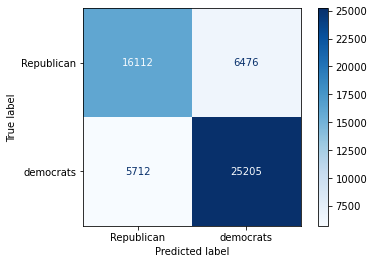

In [33]:
nb_final = MultinomialNB()

nb_final.fit(X_train_final, y_train3)

results_cleaned(nb_final,X_test_final,y_test3, X_train_final, y_train3)

### Model Group 3b: 
 * **Based on:** Words in the Title, URL, and Title Characteristics
 * **Vectorizer:** 
   * **for Words in Title:** CountVectorizer
   * **for URL:** TfidfVectorizer
 * **Model:** Logistic

Train score is:  0.7996000348879225
Test score is:  0.7845621904494907
----------------------------------------------------------------------
Specificity:  0.7040021250221357
Sensitivity:  0.8434194779571109


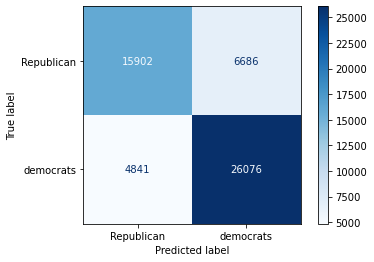

In [36]:
logreg_final = LogisticRegression(C=1,
                                  solver='liblinear',
                                  penalty='l1')

logreg_final.fit(X_train_final_s, y_train3)

results_cleaned(logreg_final,X_test_final_s,y_test3, X_train_final_s, y_train3)

Train score is:  0.7990144161879961
Test score is:  0.7878516026539576
----------------------------------------------------------------------
Specificity:  0.8446809198822655
Sensitivity:  0.7100672923676288


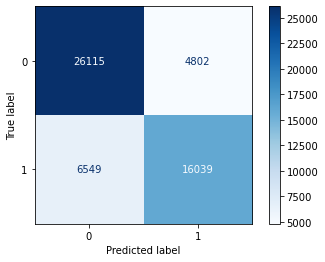

In [37]:
logreg_final = LogisticRegression(C=1,
                                  solver='liblinear',
                                  penalty='l1')

logreg_final.fit(X_train_final_s, y_train3)

results_cleaned(logreg_final,X_test_final_s,y_test3, X_train_final_s, y_train3)

### Performs best of Group 3 - so analyze the results

In [38]:
logreg_final.coef_

coefs_final = np.exp(logreg_final.coef_)
cols_final = X_train_final.columns

coefs_final_df = pd.DataFrame(zip(coefs_final[0], cols_final), columns = ['coef','feature'])

coefs_final_df.head()
 
coefs_final_df.sort_values('coef',ascending = False).head(25).set_index('feature')

,coef,feature
0,1.001104,000
1,1.009655,10
2,0.995522,100
3,1.002689,100 000
4,1.017734,11


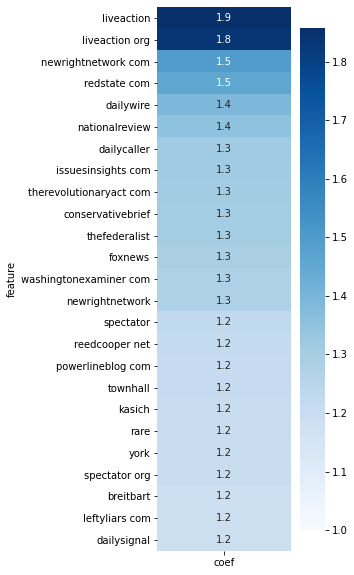

In [51]:
plt.figure(figsize = (3,10))
sns.heatmap(coefs_final_df.sort_values('coef',ascending = False).head(25).set_index('feature'),
           cmap = 'Blues',
           vmin = 1,
           annot = True)

### Model Group 3c: 
 * **Based on:** Words in the Title, URL, and Title Characteristics
 * **Vectorizer:** 
   * **for Words in Title:** CountVectorizer
   * **for URL:** TfidfVectorizer
 * **Model:** Random Forest

### Note: Not Run due to lack of time

**After completing the model with Words in the Title, URL, and Title Characteristics, I noticed that the Specificity and Sensitivity Changed compared to the models based on Words in the Title and URL, so I look at the model based on Title Characteristics to see if that's the reason for the change in these to values.**

---
## Fourth Group of Models:  Title Characteristics (Title Length and Title Word Count)
---

### try 2 models: Multinomial Naive Bayes, Logistic 
### (Random Forests takes a long time, so I don't bother for the purpose of this)
---

In [26]:
X_train3_lengths = X_train3[['title_length','title_word_count']].reset_index(drop=True)
X_test3_lengths = X_test3[['title_length','title_word_count']].reset_index(drop=True)

In [27]:
# need to scale

ss = StandardScaler()
ss.fit(X_train3_lengths)

X_train_lengths_s = ss.transform(X_train3_lengths)
X_test_lengths_s = ss.transform(X_test3_lengths)

### Model Group 4a: 
 * **Based on:** Title Characteristics (Title Length and Title Word Count)
 * **Model:** Multinomial Naive Bayes

Train score is:  0.5778374472008672
Test score is:  0.5778338473039902
----------------------------------------------------------------------
Specificity:  0.0
Sensitivity:  1.0


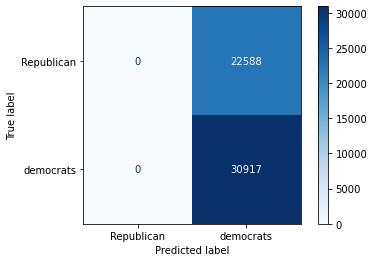

In [16]:
nb_final_short = MultinomialNB()

nb_final_short.fit(X_train3_lengths, y_train3)

results_cleaned(nb_final_short,X_test3_lengths,y_test3, X_train3_lengths, y_train3)

### Model Group 4b: 
 * **Based on:** Title Characteristics (Title Length and Title Word Count)
 * **Model:** Logistic

Train score is:  0.5850766911297457
Test score is:  0.5824689281375572
----------------------------------------------------------------------
Specificity:  0.8276676262250542
Sensitivity:  0.2468567380910218


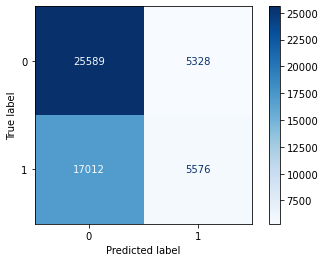

In [30]:
logreg_final_short = LogisticRegression(C=1,
                                  solver='liblinear',
                                  penalty='l1')

logreg_final_short.fit(X_train_lengths_s, y_train3)

results_cleaned(logreg_final_short,X_test_lengths_s,y_test3, X_train_lengths_s, y_train3)

In [33]:
X_train_lengths_s

array([[-0.13112893, -0.18004024],
       [-0.14793367,  0.22374174],
       [-0.33278574, -0.28098574],
       ...,
       [-0.71929461, -0.58382223],
       [ 1.43171129,  1.23319672],
       [-0.4168094 , -0.58382223]])

### Performs best of Group 4 - so analyze the results

In [34]:
logreg_final_short.coef_

coef_length = np.exp(logreg_final_short.coef_)
cols_length = X_train3_lengths.columns

coefs_df_length = pd.DataFrame(zip(coef_length[0],cols_length), columns = ['coef','feature'])

coefs_df_length.head()

,coef,feature
0,0.761149,title_length
1,0.781367,title_word_count


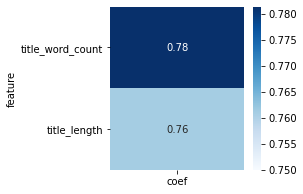

In [55]:
plt.figure(figsize = (3,3))
sns.heatmap(coefs_df_length.sort_values('coef',ascending = False).head(25).set_index('feature'),
           cmap = 'Blues',
           vmin = .75,
           annot = True)